In [1]:
import numpy as np
import matplotlib.pyplot as plt
import george
from george import kernels
from scipy.optimize import minimize
import os

In [2]:
teff, mh, lg = np.loadtxt(os.getcwd() + '/Data/stellar.dat', usecols=(1,2,3), unpack=True)
u1, u1_p, u1_d = np.loadtxt(os.getcwd() + '/Data/ldcs.dat', usecols=(1,2,3), unpack=True)
u1_err = (u1_p+u1_d)/2

In [3]:
ker = np.var(u1) * kernels.Matern32Kernel([0.5,0.5,0.5], ndim=3, axes=(0,1,2))
gp = george.GP(ker)

x = np.vstack((teff, mh))
x = np.vstack((x, lg))
x = np.transpose(x)

gp.compute(x, u1_err)

In [4]:
def neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.log_likelihood(u1)

def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(u1)

result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
print(result)

gp.set_parameter_vector(result.x)
print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(u1)))

      fun: -38.935910516702876
 hess_inv: array([[0.33140175, 0.30945423, 0.38787365, 0.21713883],
       [0.30945423, 0.9754639 , 0.2015496 , 0.31597941],
       [0.38787365, 0.2015496 , 3.62250238, 0.24427076],
       [0.21713883, 0.31597941, 0.24427076, 0.49932151]])
      jac: array([-1.16501262e-08, -8.66464809e-07,  7.49904673e-08,  8.37046200e-07])
  message: 'Optimization terminated successfully.'
     nfev: 43
      nit: 19
     njev: 43
   status: 0
  success: True
        x: array([-3.07913001, 16.15561847,  2.88201888, -2.06753399])

Final ln-likelihood: 38.94


Text(0.5, 1.0, 'For [M/H] = -0.1 and log(g) = 4.1')

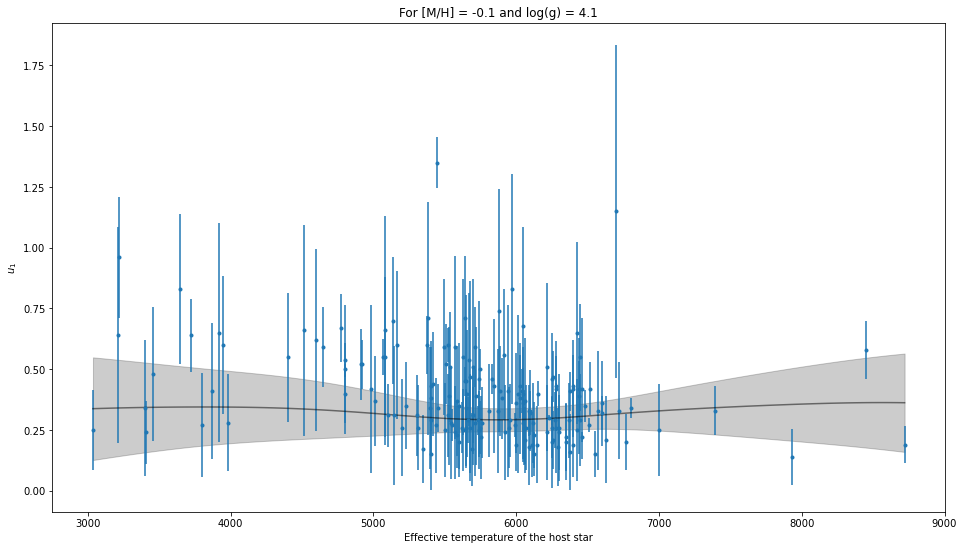

In [5]:
x1 = np.linspace(np.min(teff), np.max(teff), 100)
x2, x3 = -0.1*np.ones(100), 4.*np.ones(100)

xn = np.vstack((x1, x2))
xn = np.vstack((xn, x3))
xn = np.transpose(xn)

pred1, pred1_var = gp.predict(u1, xn, return_var=True)

plt.figure(figsize=(16,9))
plt.errorbar(teff, u1, yerr=u1_err, fmt='.')
plt.fill_between(x1, pred1 - np.sqrt(pred1_var), pred1 + np.sqrt(pred1_var), color="k", alpha=0.2)
plt.plot(x1, pred1, "k", lw=1.5, alpha=0.5)
plt.xlabel('Effective temperature of the host star')
plt.ylabel(r'$u_1$')
plt.title('For [M/H] = -0.1 and log(g) = 4.1')

Text(0.5, 1.0, 'For Teff = 6000 K and log(g) = 4.1')

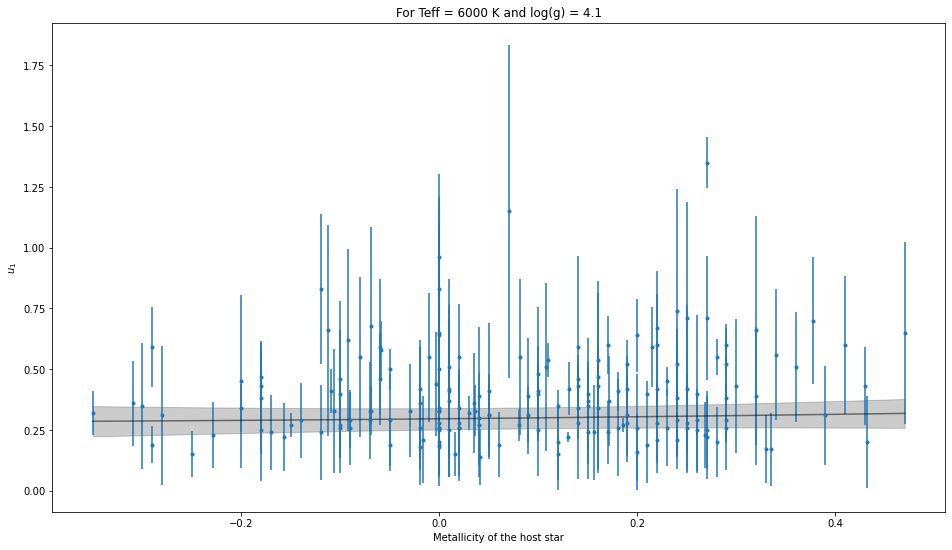

In [6]:
x2 = np.linspace(np.min(mh), np.max(mh), 100)
x1, x3 = 6000*np.ones(100), 4.*np.ones(100)

xn = np.vstack((x1, x2))
xn = np.vstack((xn, x3))
xn = np.transpose(xn)

pred1, pred1_var = gp.predict(u1, xn, return_var=True)

plt.figure(figsize=(16,9))
plt.errorbar(mh, u1, yerr=u1_err, fmt='.')
plt.fill_between(x2, pred1 - np.sqrt(pred1_var), pred1 + np.sqrt(pred1_var), color="k", alpha=0.2)
plt.plot(x2, pred1, "k", lw=1.5, alpha=0.5)
plt.xlabel('Metallicity of the host star')
plt.ylabel(r'$u_1$')
plt.title('For Teff = 6000 K and log(g) = 4.1')

Text(0.5, 1.0, 'For Teff = 6000 K and [M/H] = -0.1')

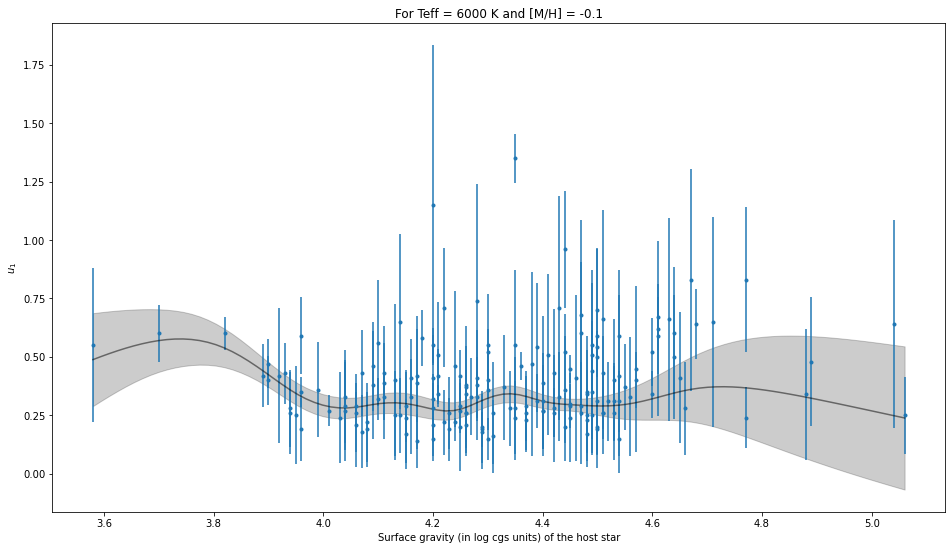

In [7]:
x3 = np.linspace(np.min(lg), np.max(lg), 100)
x1, x2 = 6000*np.ones(100), -0.1*np.ones(100)

xn = np.vstack((x1, x2))
xn = np.vstack((xn, x3))
xn = np.transpose(xn)

pred1, pred1_var = gp.predict(u1, xn, return_var=True)

plt.figure(figsize=(16,9))
plt.errorbar(lg, u1, yerr=u1_err, fmt='.')
plt.fill_between(x3, pred1 - np.sqrt(pred1_var), pred1 + np.sqrt(pred1_var), color="k", alpha=0.2)
plt.plot(x3, pred1, "k", lw=1.5, alpha=0.5)
plt.xlabel('Surface gravity (in log cgs units) of the host star')
plt.ylabel(r'$u_1$')
plt.title('For Teff = 6000 K and [M/H] = -0.1')

In [8]:
x_pred = np.array([6250.0, -0.100, 4.260])
x_pred = x_pred.reshape((1,3))

pred, pred_var = gp.predict(u1, x_pred, return_var=True)

print(r'Value of $u_1$ is: ', pred[0], r'+/-', np.sqrt(pred_var[0]))

Value of $u_1$ is:  0.24567202906208996 +/- 0.02906673592815703
